<span style="font-family: SF Pro Display; font-size: 24px; font-weight: Bold">KPMG Virtual Internship:</span> <br>
_________________
<span style="font-family: SF Pro Display; font-size: 18px; font-weight: Bold">Main-Task:</span><span style="font-family: SF Pro Display; font-size: 18px"><br>Draft an e-mail with a detailed report on the data quality issues provided by the client to KPMG. Also provide necessary recommendations going forward to mitigate the data quality issues.</span>
<br><br>
<span style="font-family: SF Pro Display; font-size: 18px; font-weight: Bold">Task-1:</span><span style="font-family: SF Pro Display; font-size: 18px">*Identify data quality Issues in the given datasets from Sprocket Central Pty Ltd.:*
><li>Customer Demographic</li>
><li>Customer Addresses</li>
><li>Transaction data in the past three months</li></span>

<span style="font-family: SF Pro Display; font-size: 18px; font-weight: Bold">1. Importing all the necessary Libraries.</span>

In [1]:
# Data analysis and wrangling.
import pandas as pd
import numpy as np
import re

# Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress all the warnings
import warnings
warnings.filterwarnings("ignore")

<span style="font-family: SF Pro Display; font-size: 18px; font-weight: Bold">2. Importing and reading the customer demographics dataset.</span>

In [74]:
cust_demo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')

<span style="font-family: SF Pro Display; font-size: 18px; font-weight: Bold">3. Checking the dataset for Duplicates and NaN Values.</span>

In [3]:
cust_demo.sample(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1039,1040,Jacenta,Wedlock,Female,78,1975-03-04,Food Chemist,Health,High Net Worth,N,TÌÌ­ÌºÌºoÍ Ì·iÌ²Ì¬ÍÌªÍnÌÌÍvÍÌÌÌÌ¦oÌ¶ÌÌ°Ì keÍÍÌ...,No,9.0
1078,1079,Dennie,L' Anglois,Male,70,1978-01-03,Nurse Practicioner,Manufacturing,Mass Customer,N,â£,No,18.0
2756,2757,Leodora,Carillo,Female,65,1961-02-18,NaN,Financial Services,Affluent Customer,N,"<>?:""{}|_+",No,8.0
1543,1544,Keane,Moneypenny,Male,75,1963-08-22,Dental Hygienist,Health,Affluent Customer,N,â£,Yes,11.0
1872,1873,Raul,Cabrer,Male,49,1992-07-09,General Manager,Manufacturing,Affluent Customer,N,ÃÃÃÃËÃÃï£¿ÃÃÃâ,Yes,4.0


In [4]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [5]:
cust_demo.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [67]:
# The given columns have NULL/NaN Values
nan_cols_cd = [i for i in cust_demo.columns if cust_demo[i].isna().any()]
print(f"Columns with Null/NaN values: {nan_cols_cd}")

Columns with Null/NaN values: ['last_name', 'DOB', 'job_title', 'job_industry_category', 'tenure', 'DOB_year']


In [6]:
# No issues when it comes to uniqueness of customer_demographics data.
print(f"Total number of records: {cust_demo.shape[0]}")
print(f"Total number of unique customer records: {len(cust_demo.drop_duplicates())}")

Total number of records: 4000
Total number of unique customer records: 4000


In [7]:
# Column:#13
## Default column is not relevant for our analysis as it does not contains legible/tangible information
## that can serve as a feature for further data analysis.
## Relevancy = None

# we can safely drop the 'default' column.
cust_demo.drop(columns='default', axis=1, inplace=True)

In [8]:
cust_demo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0


<span style="font-family: SF Pro Display; font-size: 18px; font-weight: Bold">4. Checking all the columns using Standard Data Quality Framework Table.</span>

In [9]:
# Column:#1;#2
print(f"Total number of NaN customer_id: {cust_demo['customer_id'].isna().sum()}")
print(f"Total number of NaN first_name: {cust_demo['first_name'].isna().sum()}")

Total number of NaN customer_id: 0
Total number of NaN first_name: 0


In [10]:
# Column:#3
# Last names can have NaN values**
print(f"Total number of NaN last_name: {cust_demo['last_name'].isna().sum()}")

Total number of NaN last_name: 125


In [13]:
# We also need to make sure that the first and the last names 
### don't contain any Numeric and Special characters.
def str_cont_first(name):
    return (bool(re.search(r'[^0-9a-zA-Z]+', name)))

cust_demo['fr_name'] = cust_demo['first_name'].apply(str_cont_first)

In [14]:
cust_demo['fr_name'].value_counts()

False    3983
True       17
Name: fr_name, dtype: int64

In [15]:
# underscores and apostrophes in name are acceptable.
cust_demo[cust_demo['fr_name'] == True]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,fr_name
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,True
248,249,D'arcy,Slay,Male,65,1992-09-13,Quality Control Specialist,IT,High Net Worth,N,No,9.0,True
629,630,D'arcy,Rowden,Male,90,1986-08-11,Statistician III,Property,Affluent Customer,N,Yes,17.0,True
1011,1012,Anna-diane,Preddle,Female,20,1955-05-20,Software Test Engineer III,NaN,High Net Worth,N,Yes,11.0,True
1034,1035,Kara-lynn,Doddridge,Female,77,1976-11-02,Operator,Retail,Affluent Customer,N,Yes,5.0,True
1270,1271,Jo-anne,Pringer,Female,71,1994-07-11,Accounting Assistant II,Telecommunications,Mass Customer,N,Yes,6.0,True
1710,1711,Marie-jeanne,Mattson,Female,81,1993-09-26,NaN,Manufacturing,High Net Worth,N,Yes,7.0,True
1750,1751,Sara-ann,Haddick,Female,49,1969-03-23,NaN,Health,Mass Customer,N,No,4.0,True
1787,1788,Anna-diana,Kurten,Female,79,1964-08-10,Account Representative IV,Financial Services,High Net Worth,N,Yes,10.0,True
1859,1860,Holly-anne,Hamman,Female,4,1976-12-28,Nuclear Power Engineer,Manufacturing,Mass Customer,N,Yes,17.0,True


In [21]:
cust_demo.drop(columns='fr_name', axis=1, inplace=True)

In [16]:
# Column:#4
# Typos need to be fixed.
cust_demo['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [93]:
# We have to replace the F, M and Femal typos in the Gender column.
gender_typos = {'F': 'Female', 'M': 'Male', 'Femal': 'Female', 'U':'Unknown'}
cust_demo['gender'].replace(gender_typos, inplace=True)

In [94]:
cust_demo['gender'].value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [23]:
# Column:#5
cust_demo['past_3_years_bike_related_purchases'].describe()
#No NaN values in the column.

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [64]:
# Column:#6
# DOB
# 87 NaN values.
cust_demo['DOB'].isna().sum()

87

In [25]:

cust_demo['DOB'].describe(datetime_is_numeric=True)

count                          3913
mean     1977-07-12 23:56:41.277792
min             1843-12-21 00:00:00
25%             1968-01-22 00:00:00
50%             1977-07-22 00:00:00
75%             1987-02-28 00:00:00
max             2002-03-11 00:00:00
Name: DOB, dtype: object

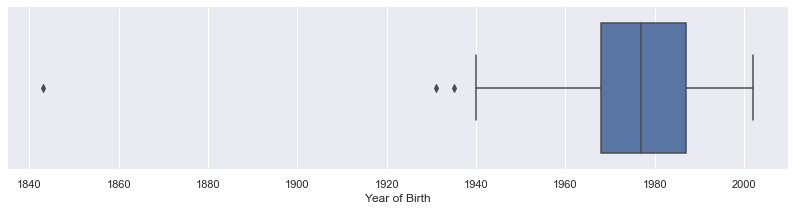

In [49]:
plt.subplots(figsize=(14,3))
sns.boxplot(x= [d.year for d in cust_demo['DOB']])
plt.xlabel("Year of Birth")
sns.set_theme(style='white')
sns.set_style("darkgrid")

In [55]:
cust_demo['DOB_year'] = cust_demo['DOB'].dt.year

In [62]:
#Consistency issues.
dob_filt = (cust_demo['DOB_year'] <= 1920)
cust_demo.loc[dob_filt, ['DOB','first_name', 'last_name']]
# Birth-year 1843 is an outlier and needs to be replaced.

,DOB,first_name,last_name
33,1843-12-21,Jephthah,Bachmann


In [68]:
cust_demo.drop(columns='DOB_year', axis=1, inplace=True)

In [69]:
cust_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [50]:
# Column:#9
# check the DOB's of the deceased persons to verify it with the outliers in the DOB column.
cust_demo['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [52]:
#Filter out the Deceased customers.
di_filt = (cust_demo['deceased_indicator'] == 'Y')
cust_demo.loc[di_filt, 'DOB']

752    1970-03-07
3789   1959-05-31
Name: DOB, dtype: datetime64[ns]

In [87]:
cust_demo['job_title'].unique()

array(['Executive Secretary', 'Administrative Officer',
       'Recruiting Manager', nan, 'Senior Editor', 'Media Manager I',
       'Business Systems Development Analyst', 'Senior Quality Engineer',
       'Nuclear Power Engineer', 'Developer I', 'Account Executive',
       'Junior Executive', 'Media Manager IV', 'Sales Associate',
       'Professor', 'Geological Engineer', 'Project Manager',
       'Safety Technician I', 'Research Assistant I',
       'Accounting Assistant III', 'Editor', 'Research Nurse',
       'Safety Technician III', 'Staff Accountant III', 'Legal Assistant',
       'Product Engineer', 'Information Systems Manager',
       'VP Quality Control', 'Social Worker', 'Senior Cost Accountant',
       'Assistant Media Planner', 'Payment Adjustment Coordinator',
       'Food Chemist', 'Accountant III', 'Director of Sales',
       'Senior Financial Analyst', 'Registered Nurse',
       'Biostatistician II', 'Computer Systems Analyst II',
       'Software Test Engineer II', 

In [88]:
cust_demo['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [89]:
cust_demo['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [90]:
cust_demo['wealth_segment'] = cust_demo['wealth_segment'].astype('category')

In [91]:
cust_demo['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [92]:
cust_demo['owns_car'] = cust_demo['owns_car'].astype('category')

<span style="font-family: SF Pro Display; font-size: 18px; font-weight: Bold">5. Importing and reading the customer Addresses dataset.</span>

In [73]:
cust_add = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress')

In [75]:
cust_add.sample(5)

,customer_id,address,postcode,state,country,property_valuation
3280,3285,2094 Bunting Junction,3059,VIC,Australia,9
3073,3078,9 Rieder Avenue,2798,NSW,Australia,6
3074,3079,45201 Atwood Place,2176,NSW,Australia,9
3927,3932,60272 Montana Drive,2223,NSW,Australia,8
57,62,41 Schurz Center,2749,New South Wales,Australia,8


In [78]:
cust_add.info()
# there are no NULL/NaN values in the address dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [76]:
# Null/NaN values in the customer address dataset.
cust_add.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [79]:
# No issues when it comes to uniqueness of customer_demographics data.
print(f"Total number of records: {cust_add.shape[0]}")
print(f"Total number of unique customer records: {len(cust_add.drop_duplicates())}")

Total number of records: 3999
Total number of unique customer records: 3999


In [80]:
# there are some inconsistencies with the Australian state names.
cust_add['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [83]:
cust_add['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [85]:
state_typos = {'New South Wales': 'NSW', 'Victoria': 'VIC'}
cust_add['state'].replace(state_typos, inplace=True)

In [86]:
cust_add['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [82]:
# This feature can be removed as all the address datas corresponds to the residents of Australia.
cust_add['country'].unique()

array(['Australia'], dtype=object)

In [95]:
print(f"Total number of unique customer_ids: {len(cust_add['customer_id'].drop_duplicates())}")

Total number of unique customer_ids: 3999


In [98]:
demo_add_df = cust_demo.merge(cust_add, on='customer_id')

In [103]:
# On merging customer demographics and address dataframes we have 3996 unque entries
demo_add_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3996 non-null   int64         
 1   first_name                           3996 non-null   object        
 2   last_name                            3871 non-null   object        
 3   gender                               3996 non-null   object        
 4   past_3_years_bike_related_purchases  3996 non-null   int64         
 5   DOB                                  3909 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3341 non-null   object        
 8   wealth_segment                       3996 non-null   category      
 9   deceased_indicator                   3996 non-null   object        
 10  default     

<span style="font-family: SF Pro Display; font-size: 18px; font-weight: Bold">6. Importing and reading the Transaction dataset.</span>

In [105]:
transact_3m = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions')

In [107]:
transact_3m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [109]:
transact_3m['customer_id'].nunique()

3494